<a href="https://colab.research.google.com/github/mukami3juma/Spam/blob/main/WEEK_9_SPAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATASET 2 PROJECT(SPAM)

## 1. Defining the Question

### a) Specifying the Question

We would like to have a predictive modeling solution to a problem that determines whether an email received is classified as spam or non-spam based on certain diagnostic measurements included in the provided dataset.

### b) Defining the Metric for Success

The model will be considered a success if it obtains an accuracy between 80%-90% as this range doesnt reflect under or overfitting.

### c) Understanding the context 

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters....

The collection of spam e-mails came from a postmaster and individuals who had filed spam. The collection of non-spam e-mails came from filed work and personal e-mails, and hence the word 'george' and the area code '650' are indicators of non-spam. These are useful when constructing a personalized spam filter. One would either have to blind such non-spam indicators or get a very wide collection of non-spam to generate a general purpose spam filter.

### d) Recording the Experimental Design

In order to work on the above problem we will:
1.) Randomly partition each dataset into two parts i.e 80 - 20  sets.
2.) Perform classification of the testing set samples using the Naive Bayes Classifier
3.) Compute the accuracy (percentage of correct classification)
4.) Report the confusion matrix of the classifier.
5.) Repeat step 1 and step 2 twice, each time splitting the datasets differently i.e. 70-30, 60-40, then note the outcomes of our modeling.
6.) Suggest and apply at least one of the optimization techniques learnt
7.) Provide further recommendations to improve both classifiers.

### e) Data Relevance

The relavance of our data is backed by a sspam dataset containing frequency of words that could render an email spam or not. It includes https://archive.ics.uci.edu/ml/datasets/Spambase showing the aforementioned details and revealing that our dataset is sufficient and is from a reliable source.

## 2. Reading the Data

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [188]:
col_name = ['word_freq_make','word_freq_address','word_freq_all','word_freq_3d','word_freq_our','word_freq_ove','word_freq_remove',
            'word_freq_internet','word_freq_order','word_freq_mail','word_freq_receive','word_freq_will','word_freq_people',
            'word_freq_report','word_freq_addresses','word_freq_free','word_freq_business','word_freq_email','word_freq_you',
            'word_freq_credit','word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl',
            'word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857','word_freq_data',
            'word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts','word_freq_pm','word_freq_direct',
            'word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project','word_freq_re','word_freq_edu','word_freq_table',
            'word_freq_conference','char_freq_;','char_freq_(','char_freq_[','char_freq_!','char_freq_$','char_freq_#','capital_run_length_average',
            'capital_run_length_longest','capital_run_length_total','spam']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data',names = col_name)
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_ove,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## 3. Checking the Data

In [189]:
len(col_name)

58

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_ove               4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [191]:
df.shape

(4601, 58)

In [192]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_ove,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,0.265384,0.767305,0.124845,0.098915,0.102852,0.064753,0.047048,0.097229,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,0.886955,3.367292,0.538576,0.593327,0.456682,0.403393,0.328559,0.555907,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

## 5. Tidying the Dataset

In [194]:
# Identifying the Missing Data
df.isna().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_ove                 0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [195]:
# Checking for Anomalies
for b in df:
  print(b,df[b].unique())

word_freq_make [0.   0.21 0.06 0.15 0.05 1.17 0.3  0.18 0.49 0.46 0.73 0.23 0.12 0.66
 0.75 0.47 0.59 1.24 0.5  0.16 0.41 1.   0.36 0.39 0.67 0.42 0.14 0.62
 0.52 0.17 0.44 0.34 0.43 2.12 0.54 0.53 0.51 0.45 0.22 0.07 1.03 0.26
 0.19 0.84 0.08 0.48 0.8  0.58 0.25 0.4  0.1  1.63 0.35 0.64 0.63 0.65
 0.2  0.6  0.76 0.11 1.05 0.29 0.33 0.27 0.31 0.09 0.32 0.57 0.9  0.28
 0.56 2.43 1.18 0.13 2.32 0.68 0.79 1.26 0.89 0.7  0.82 0.87 0.24 0.95
 0.93 0.98 1.01 0.72 0.71 1.23 2.35 0.78 0.38 0.74 1.36 1.47 0.69 1.06
 1.61 1.04 0.37 1.19 1.44 0.61 0.86 0.77 0.99 0.85 4.54 0.96 0.02 1.14
 0.81 1.02 1.11 2.77 0.01 2.   0.04 0.03 1.09 0.97 1.16 2.27 1.07 3.94
 1.75 3.03 0.83 0.55 1.12 2.85 3.84 1.31 1.08 1.49 4.   1.39 4.34 1.42
 1.88 0.88]
word_freq_address [6.400e-01 2.800e-01 0.000e+00 1.200e-01 6.900e-01 4.200e-01 6.300e-01
 7.000e-02 6.800e-01 4.800e-01 4.100e-01 4.500e-01 3.000e-01 4.600e-01
 1.920e+00 3.600e-01 1.260e+00 5.900e-01 3.400e-01 2.400e-01 5.300e-01
 4.400e-01 9.400e-01 1.800e-01 7

There are no anomalies detected in the data.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much

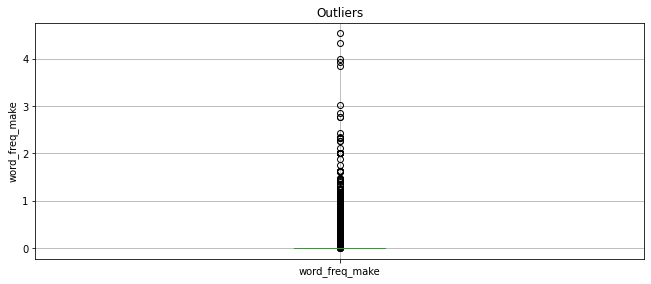

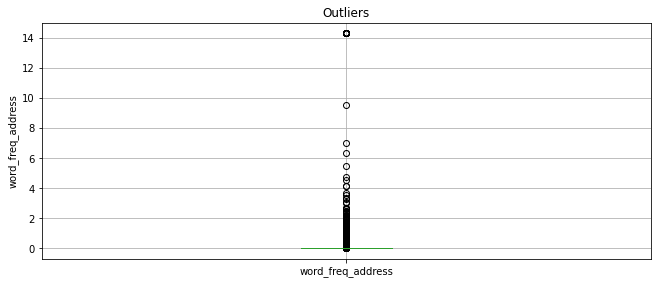

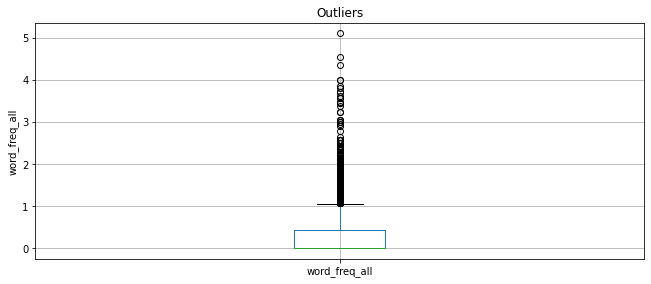

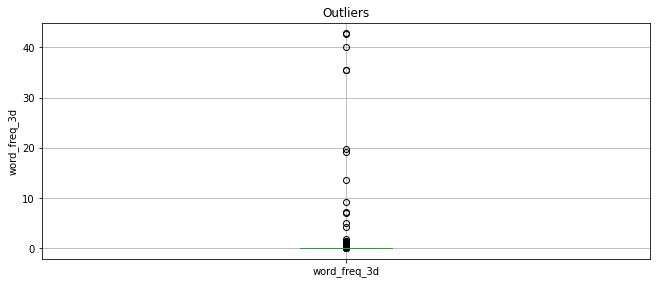

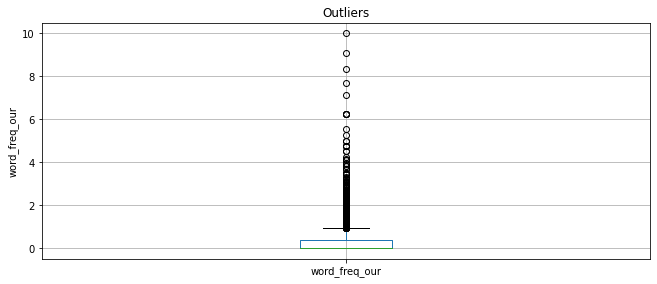

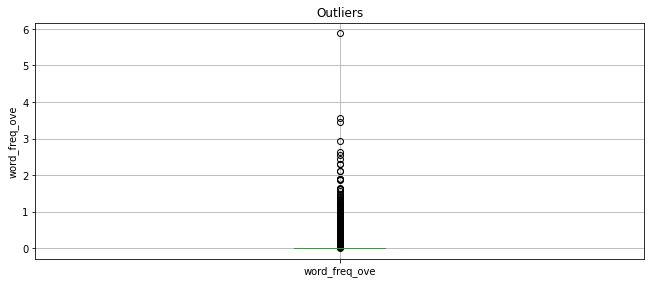

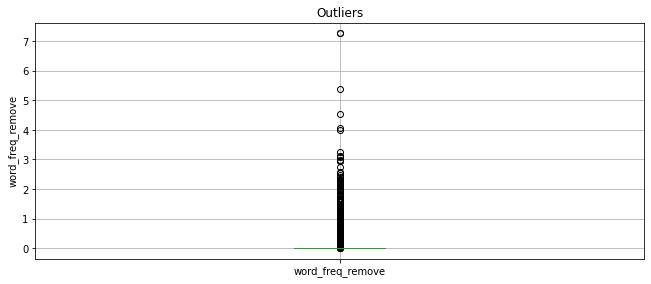

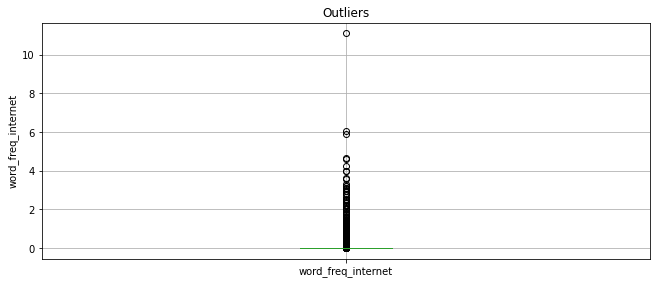

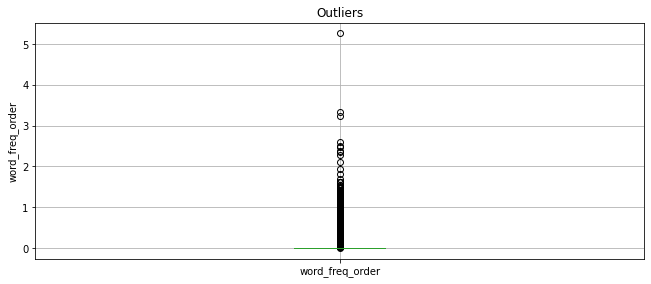

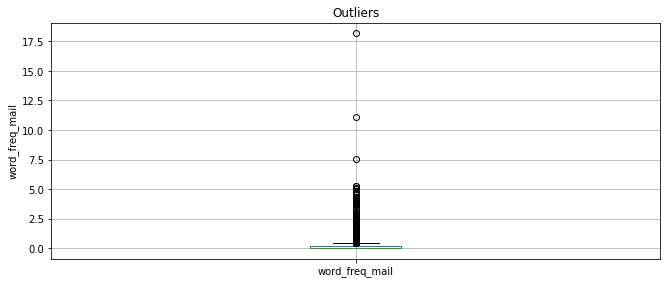

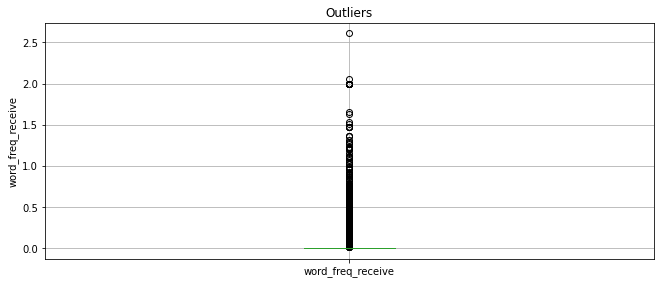

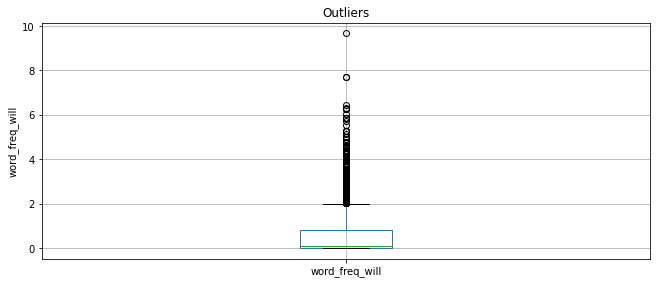

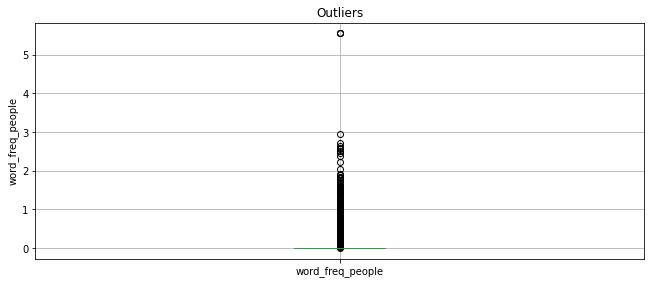

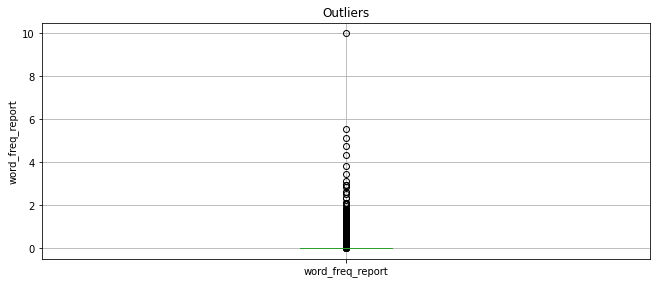

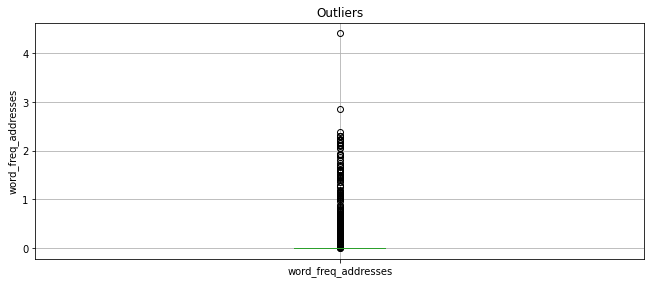

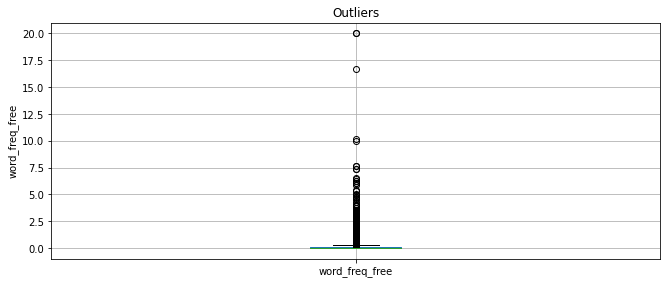

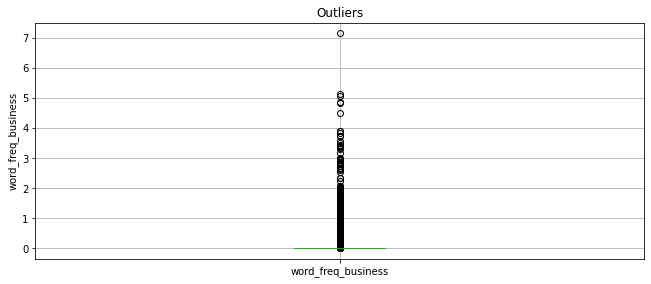

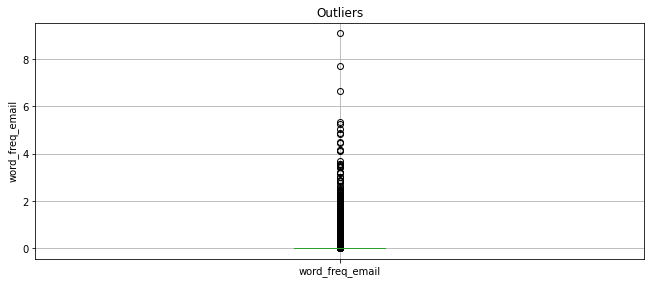

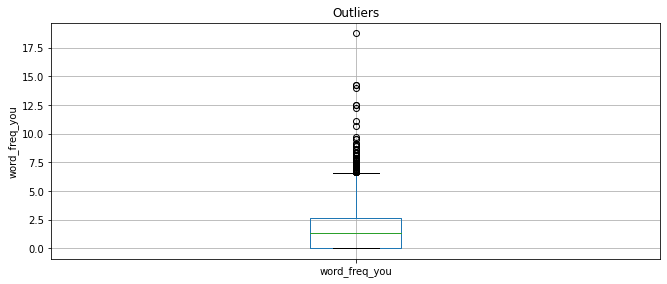

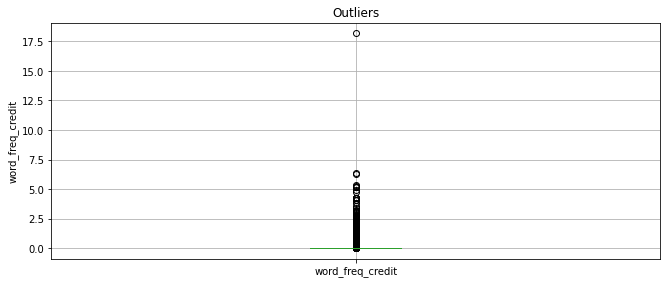

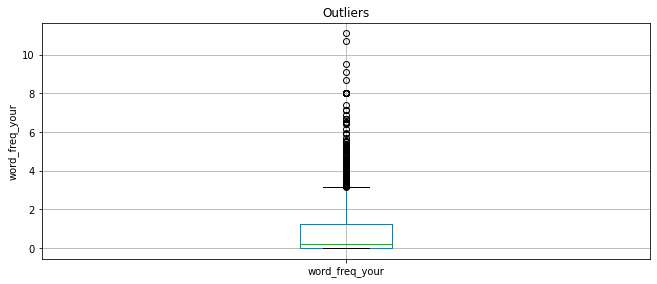

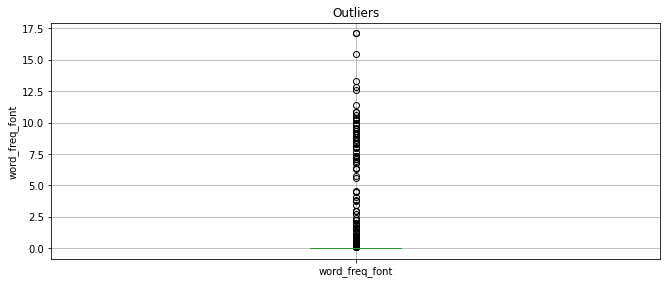

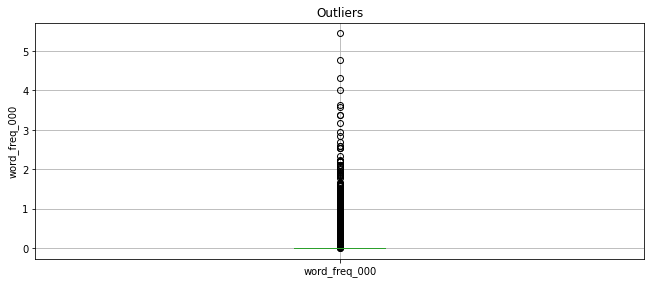

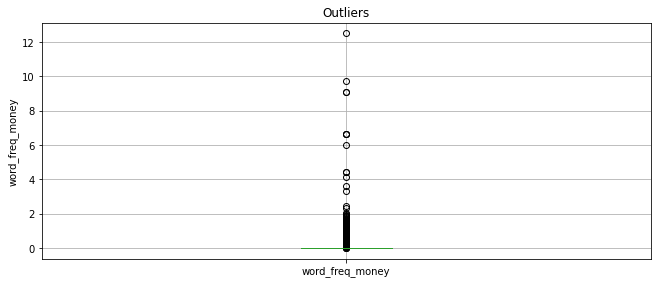

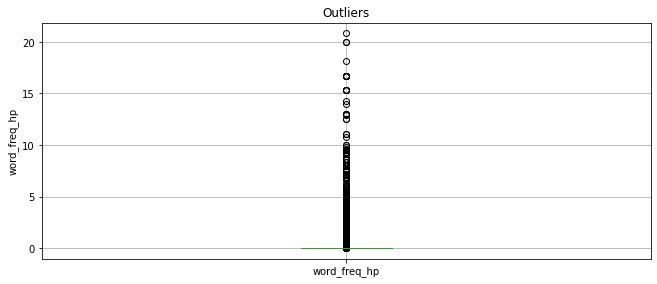

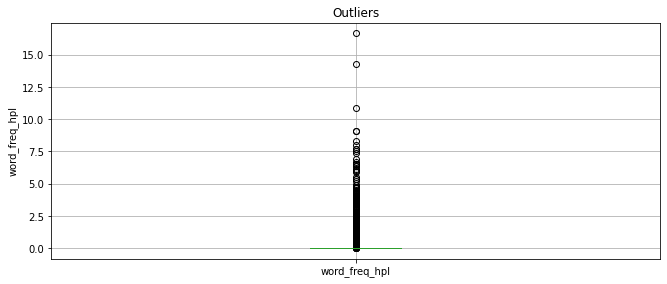

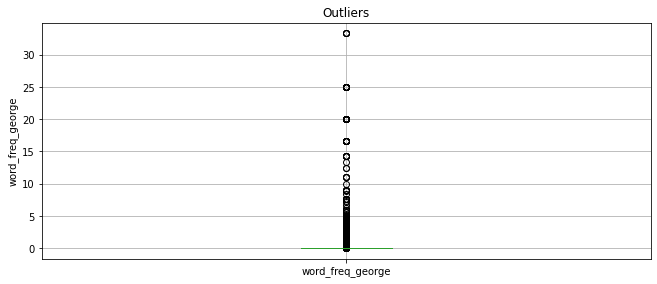

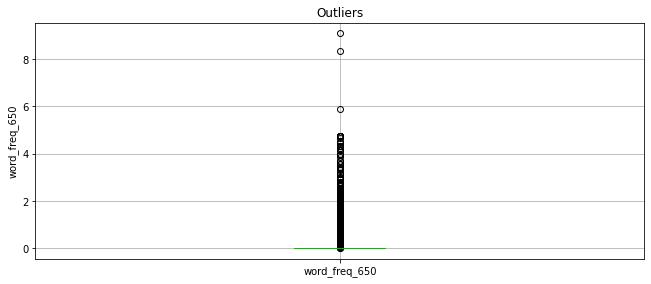

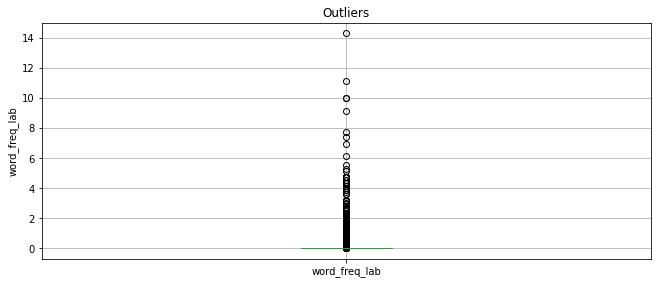

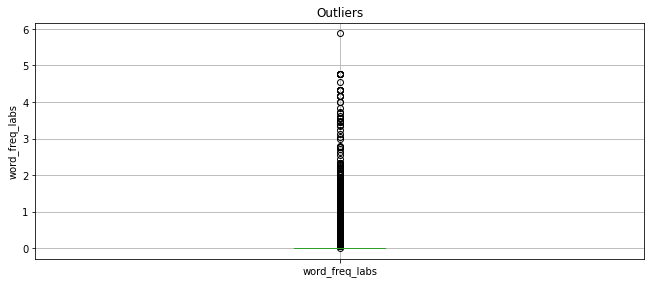

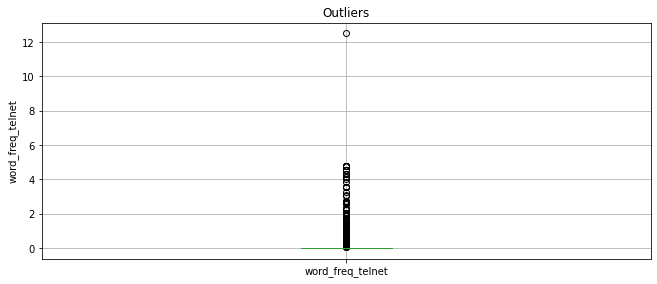

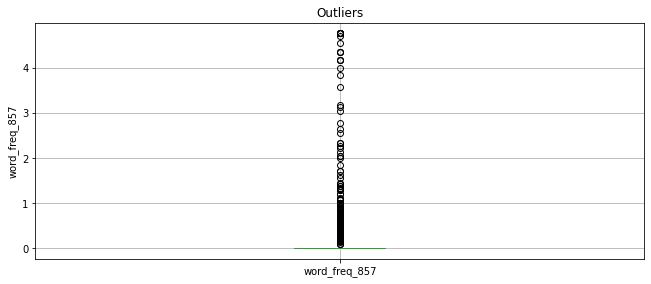

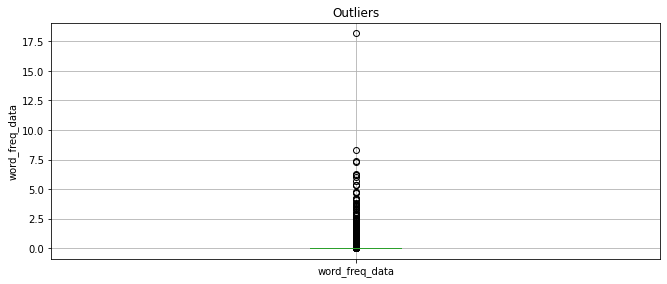

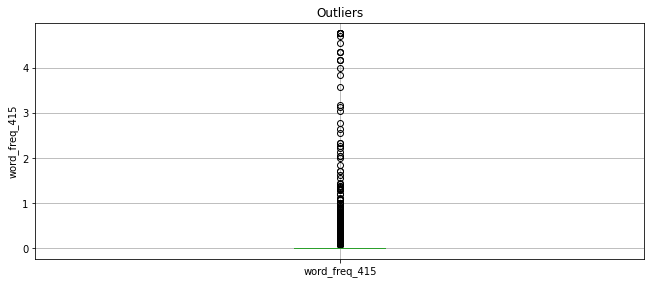

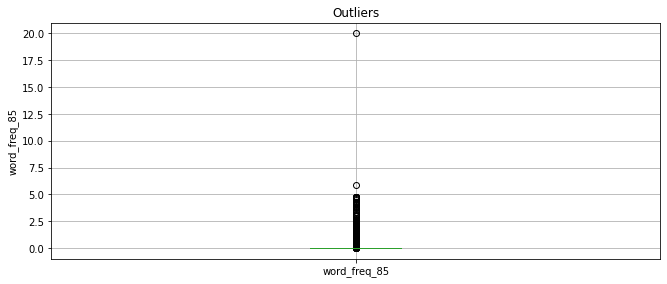

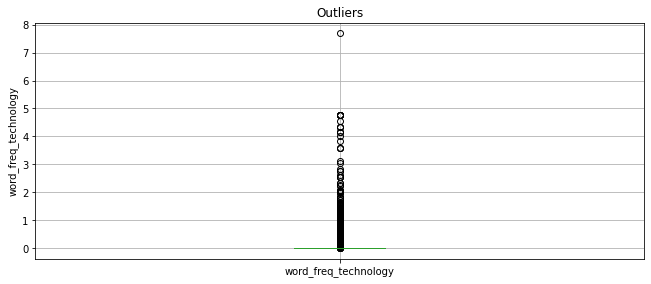

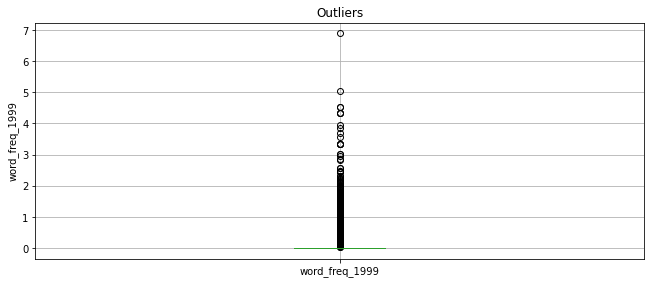

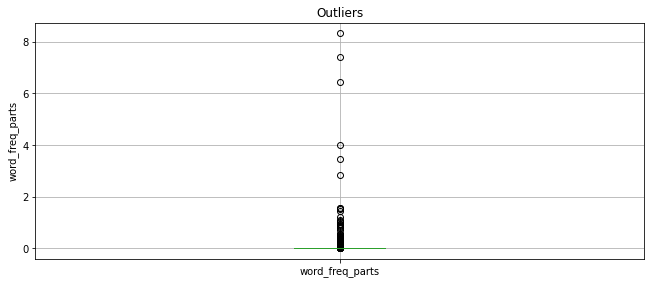

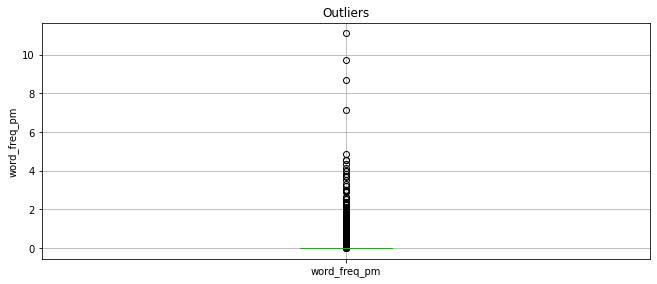

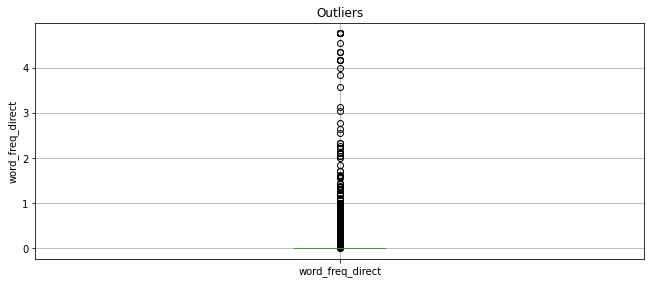

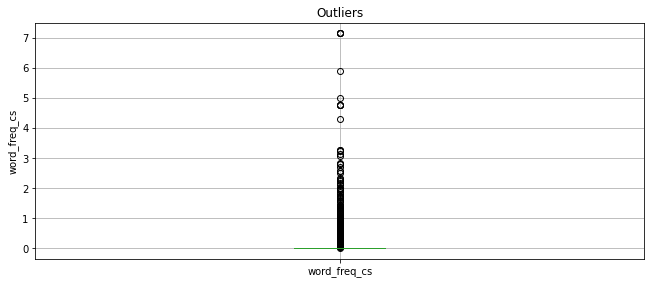

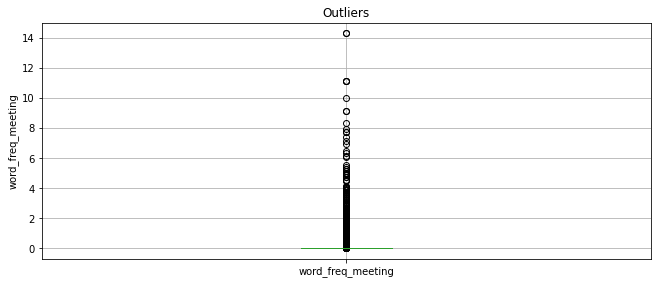

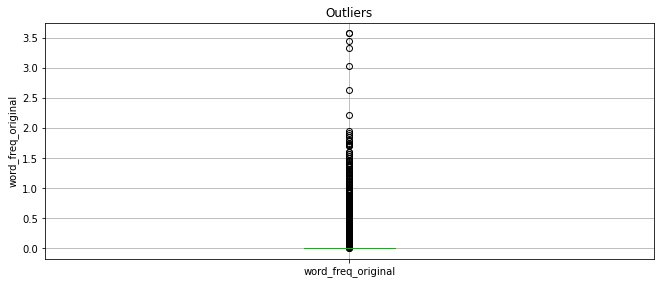

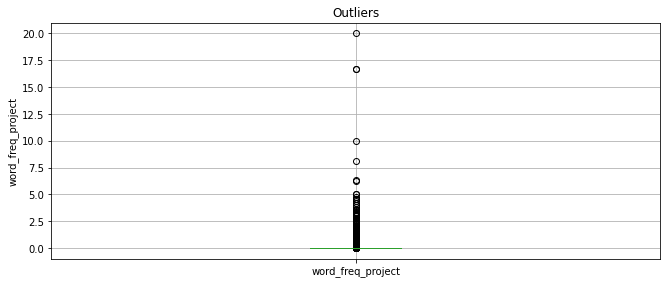

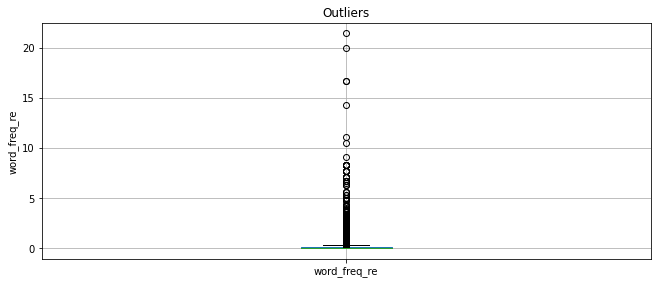

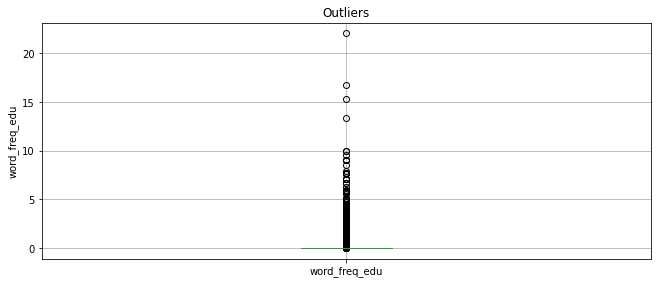

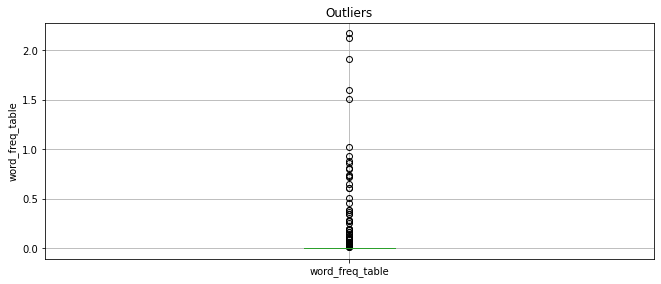

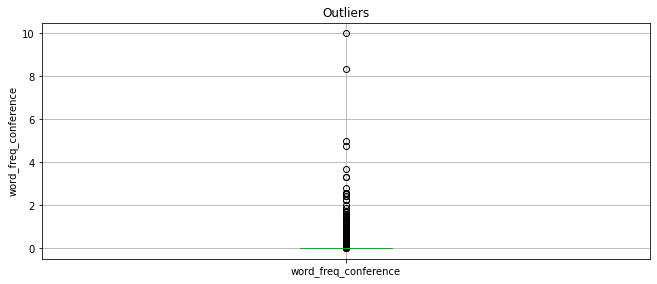

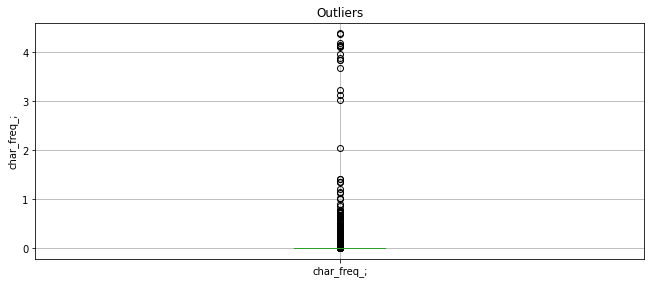

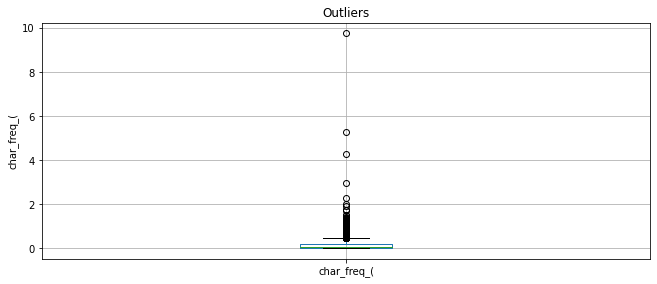

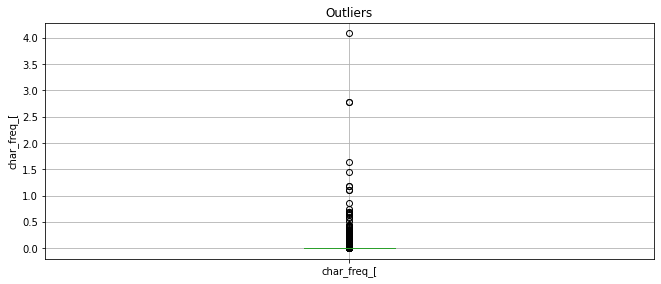

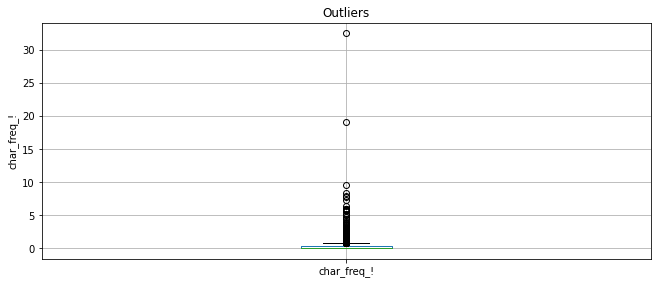

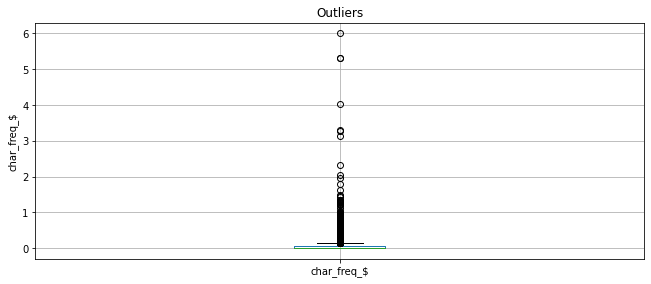

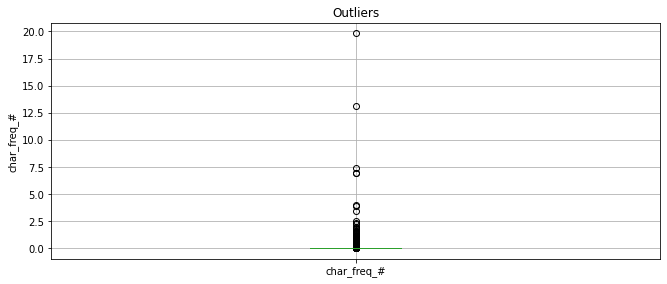

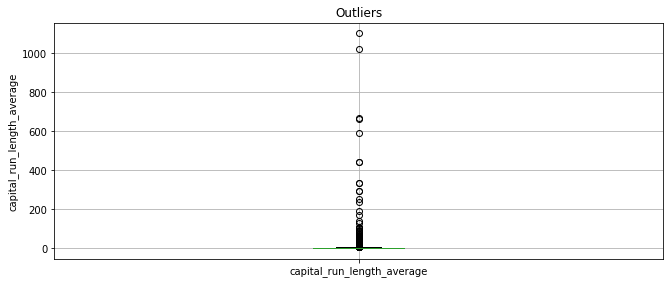

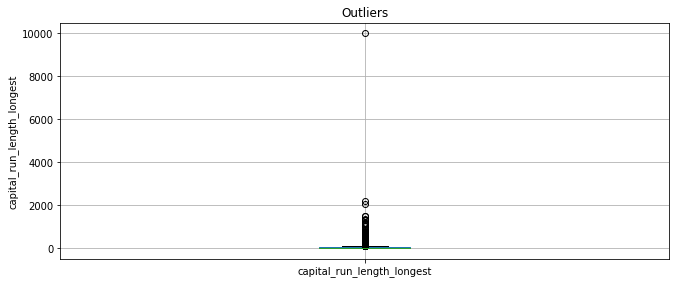

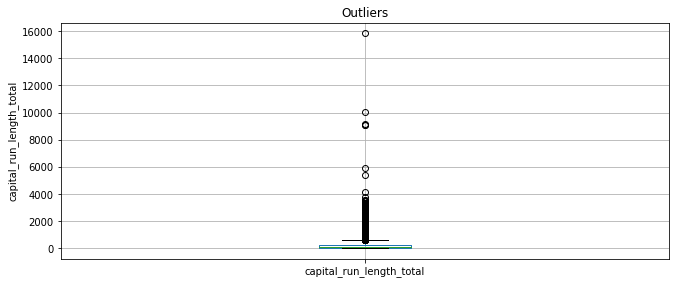

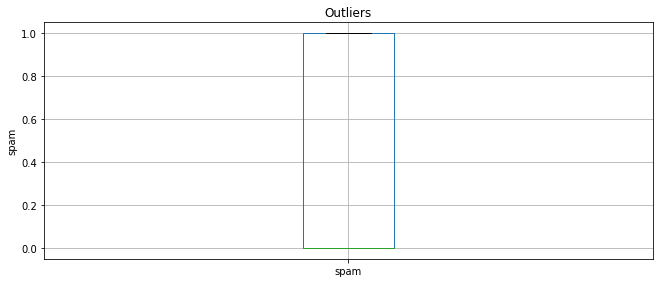

In [196]:
# Checking for Outliers

for i in df:
  plt.figure(figsize=(24,20))
  plt.subplot(4, 2, 1)
  fig = df.boxplot(column=i)
  fig.set_title('Outliers')
  fig.set_ylabel(i)


We will not drop the outliers as they are quite many and may affect our model's performance. Also,these outliers may play a huge part in determining whether an email is spam or not.

## 6. Exploratory Analysis

Univariate analysis

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


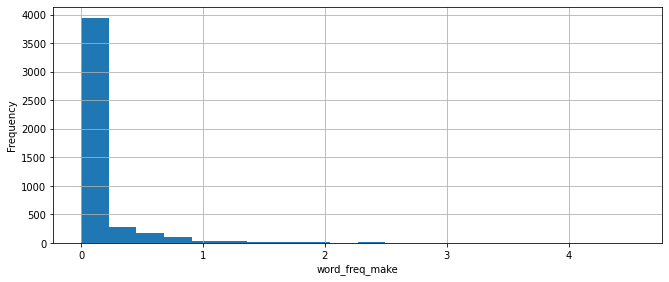

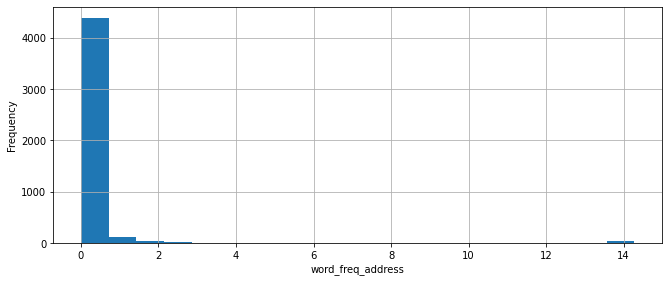

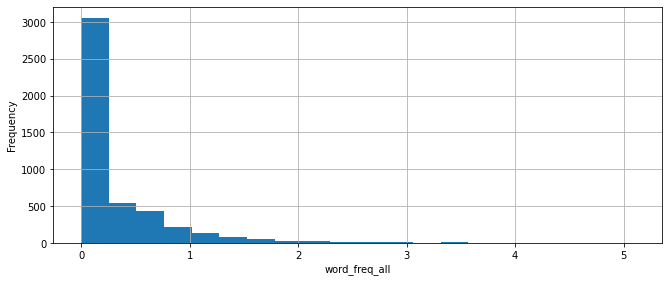

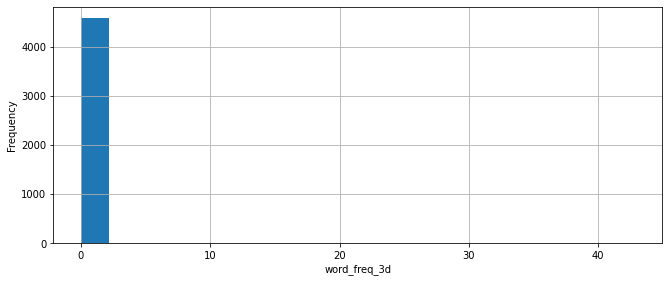

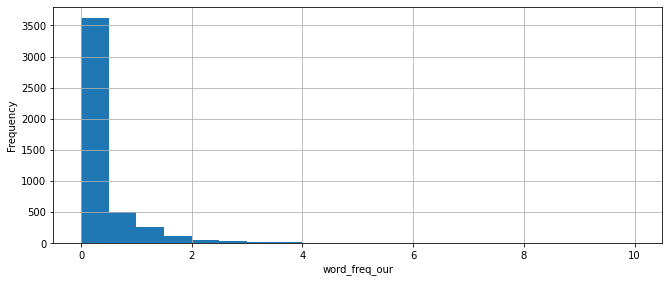

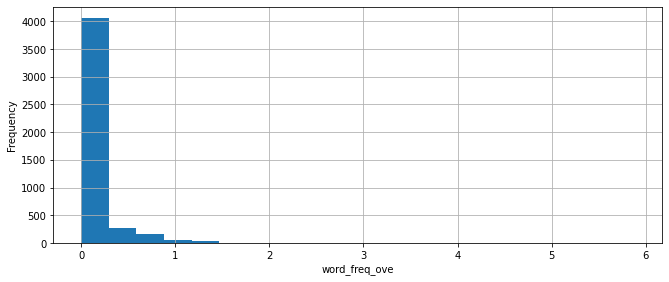

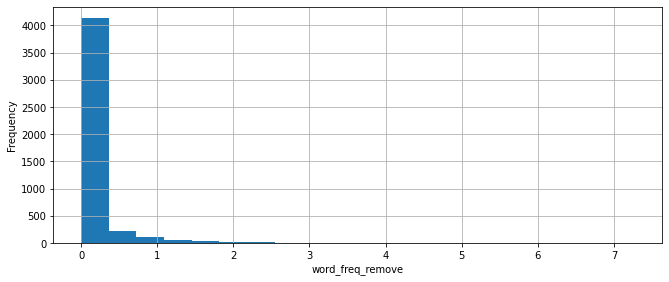

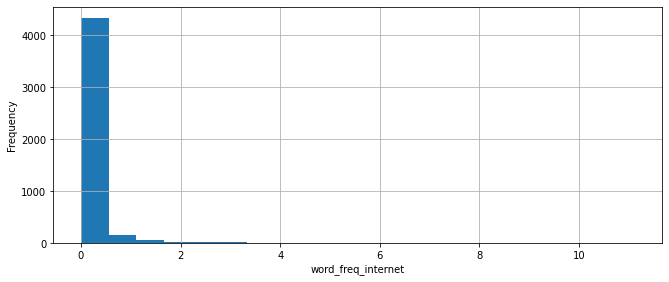

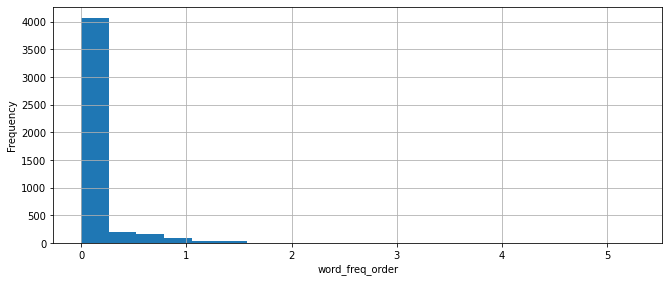

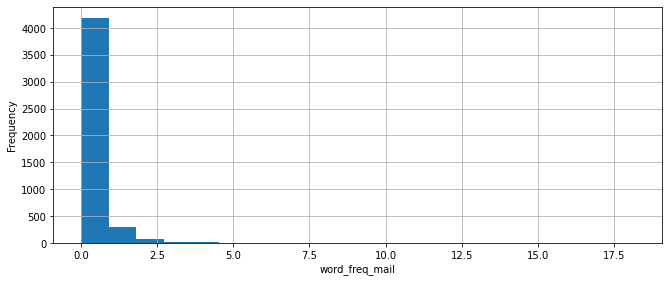

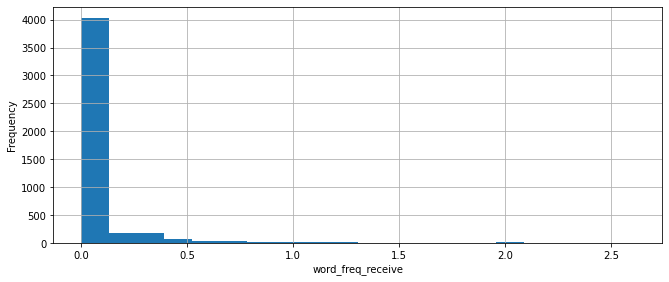

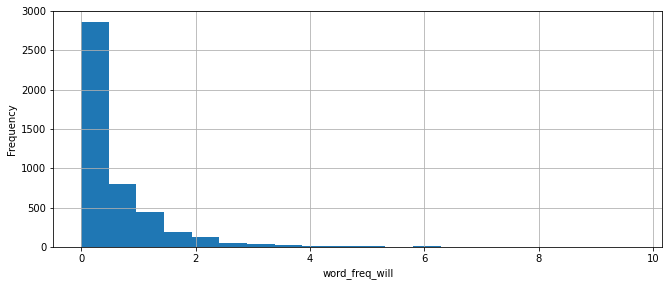

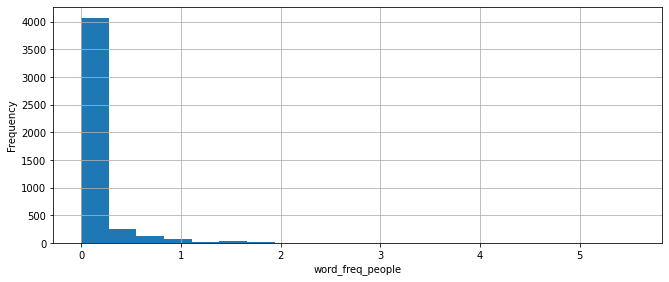

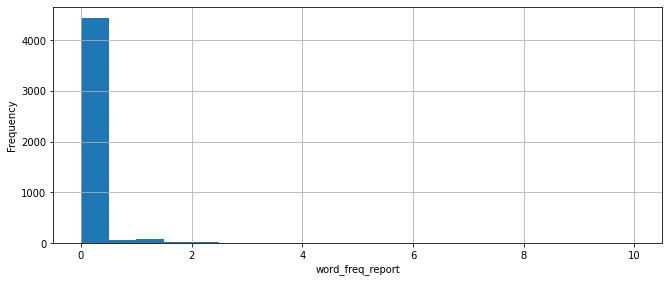

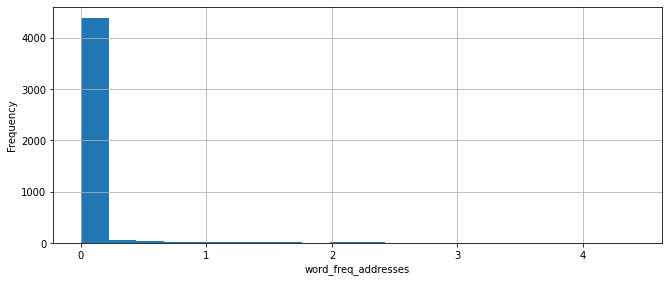

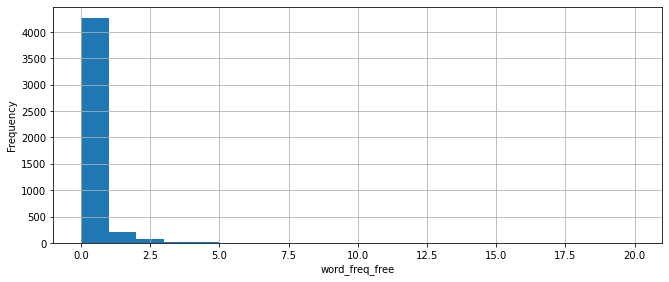

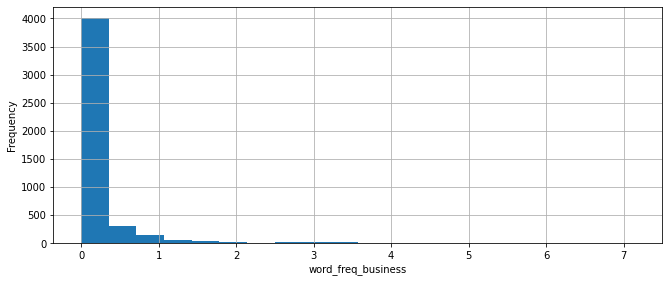

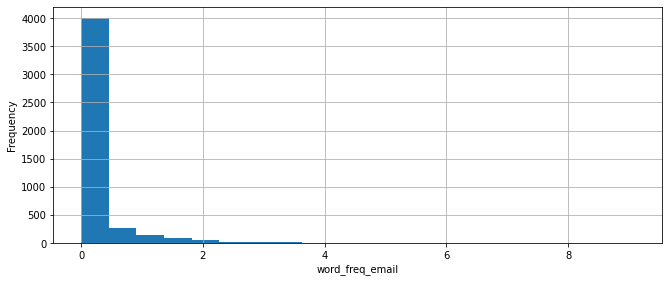

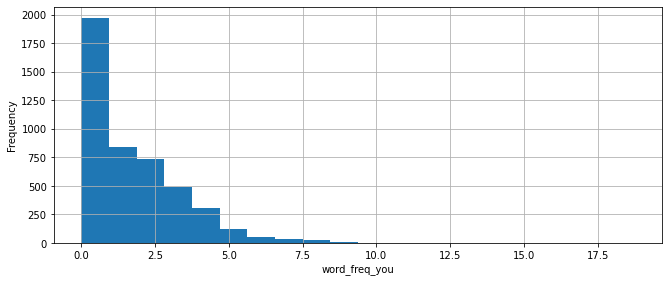

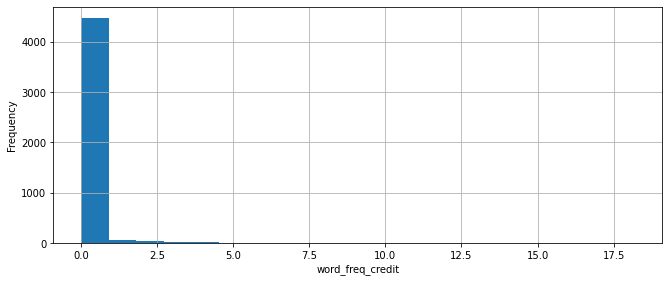

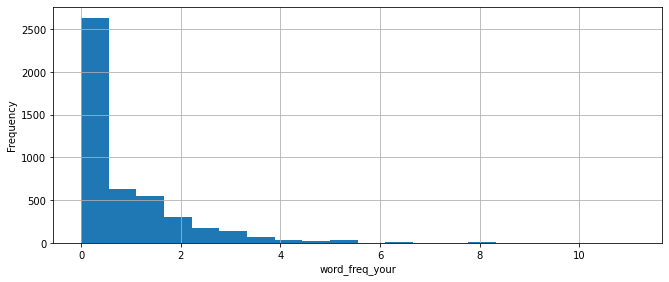

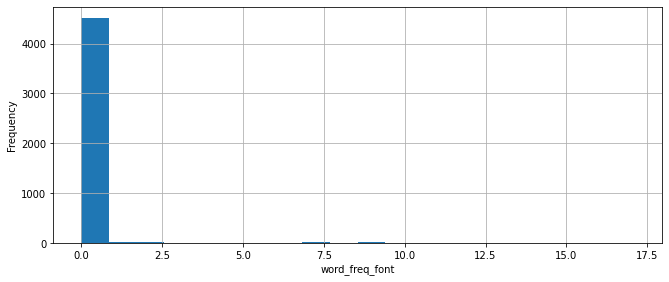

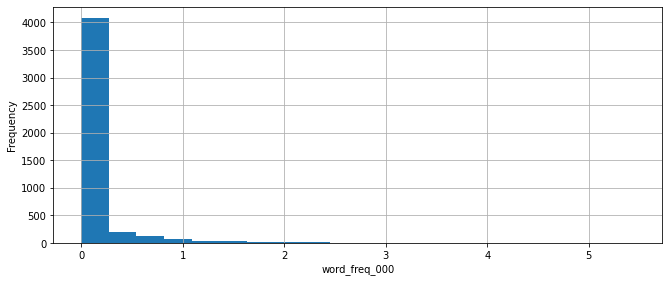

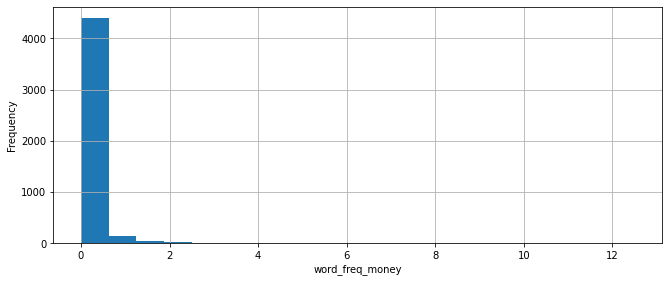

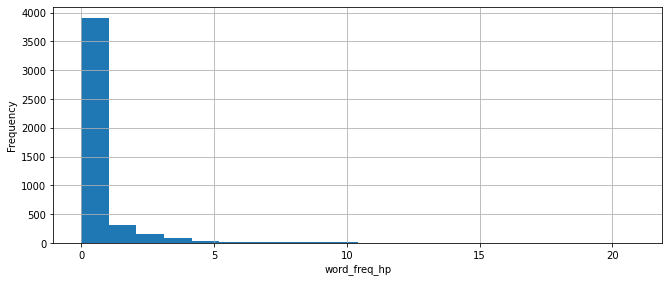

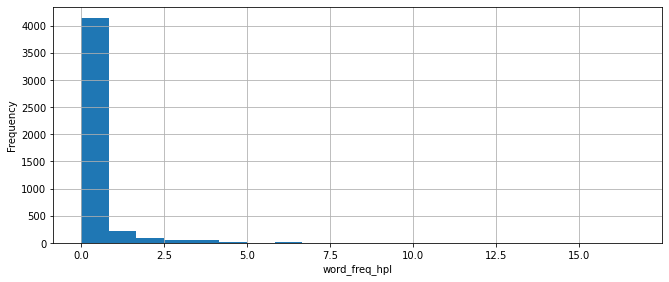

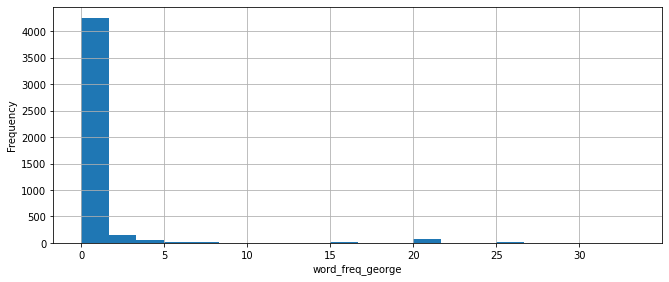

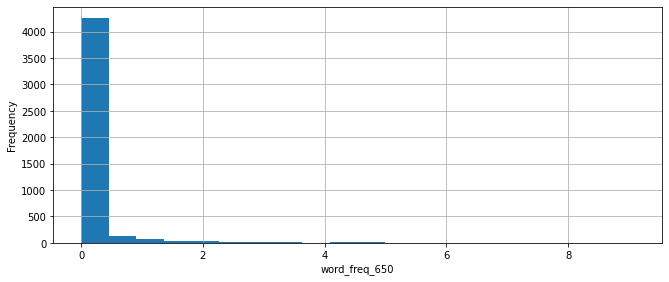

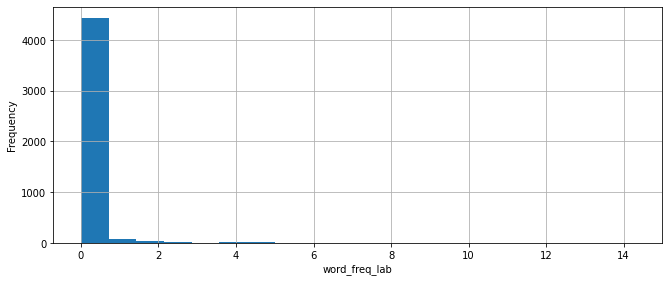

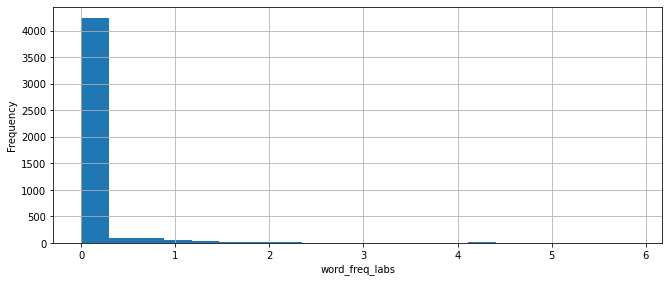

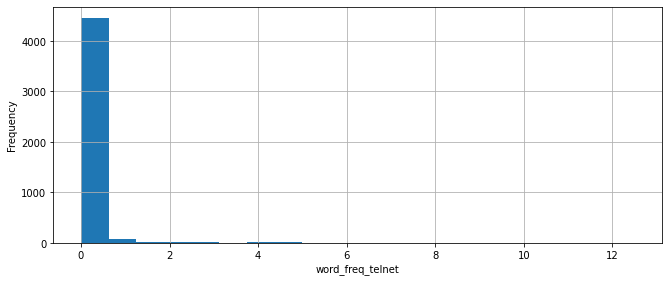

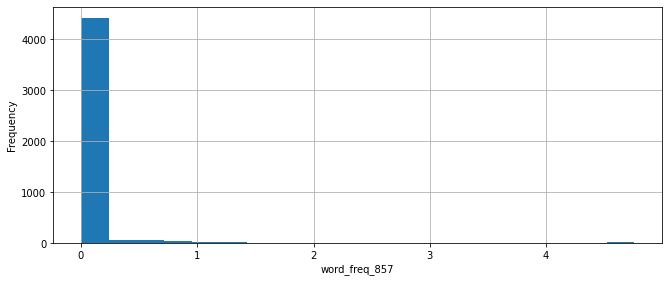

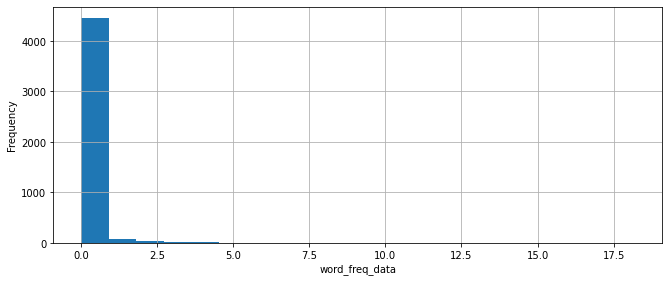

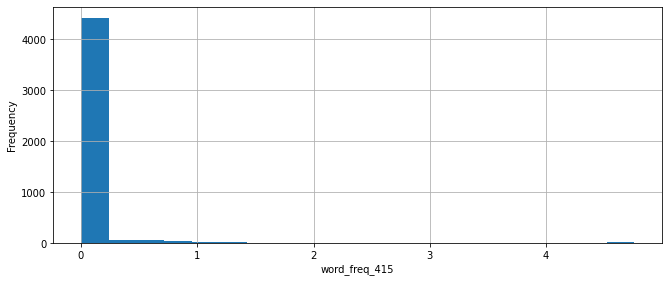

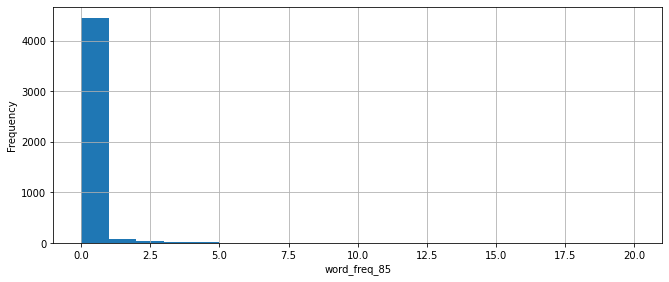

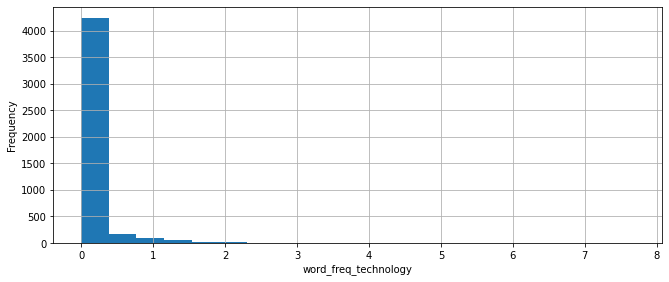

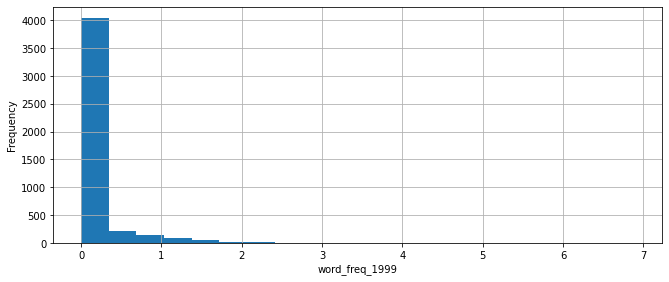

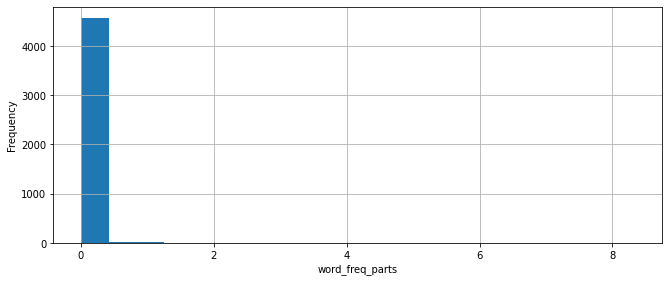

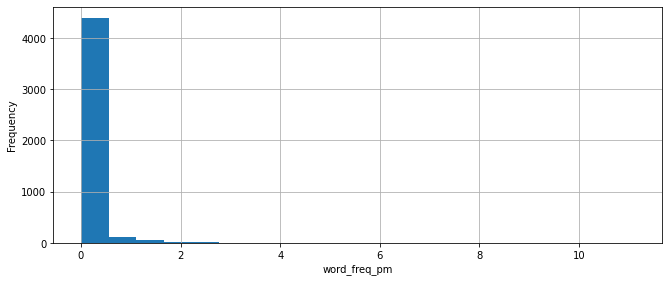

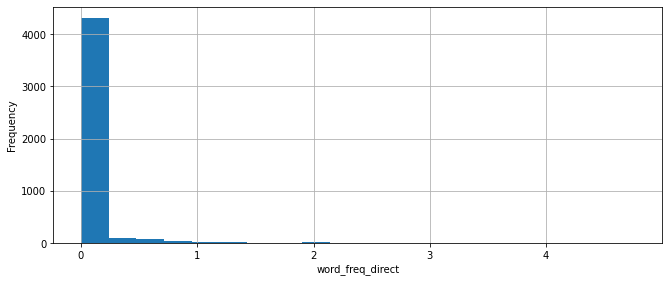

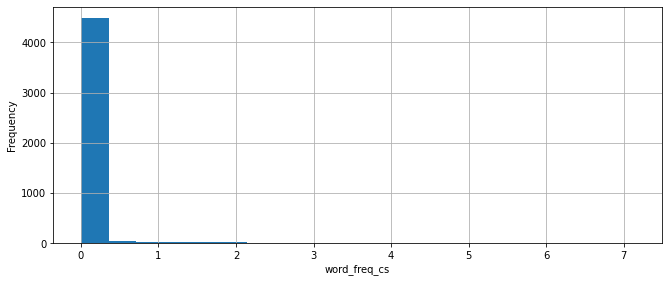

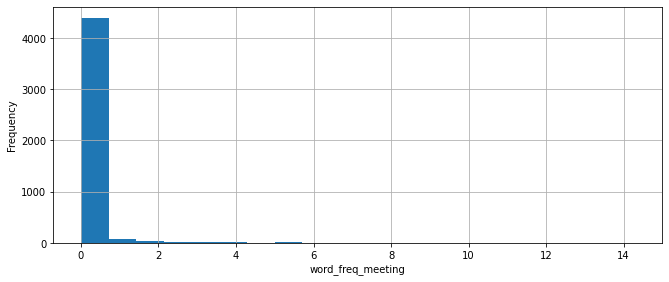

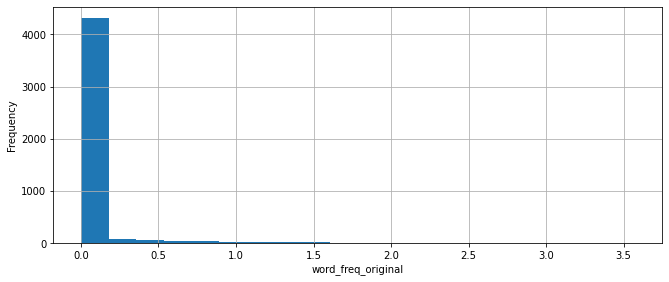

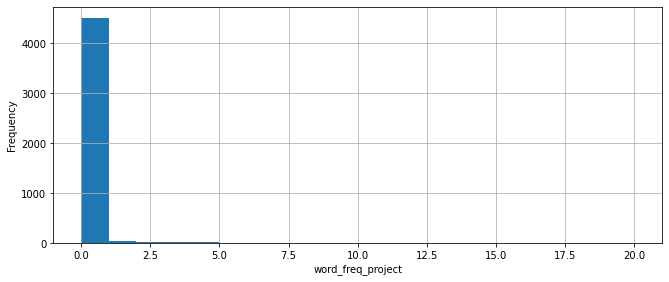

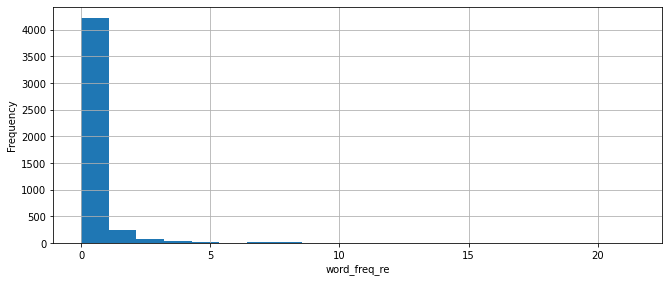

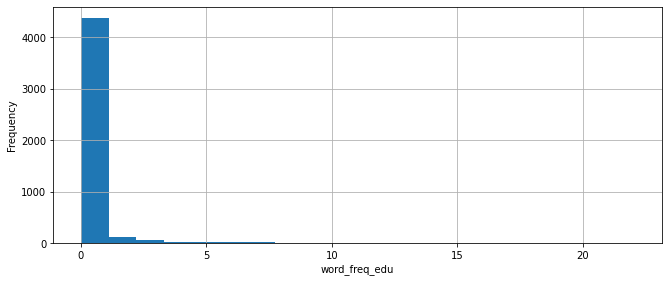

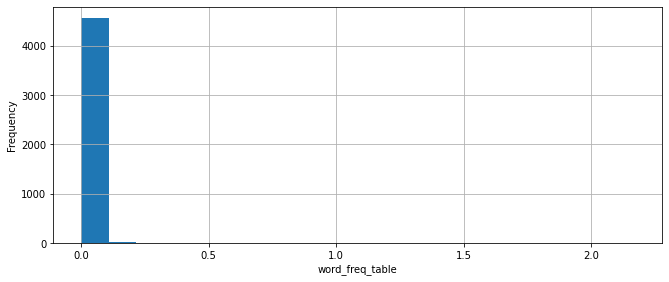

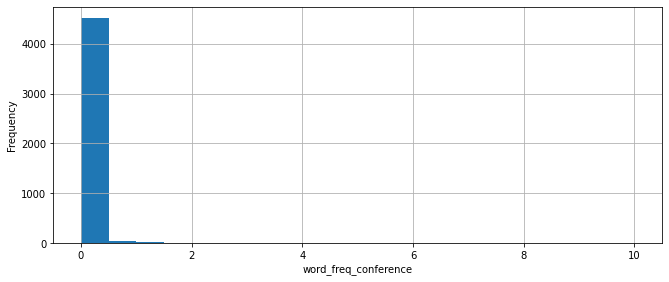

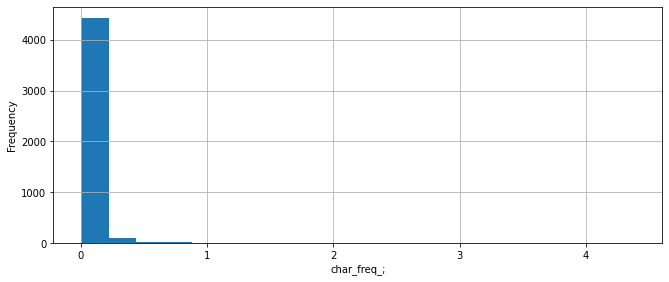

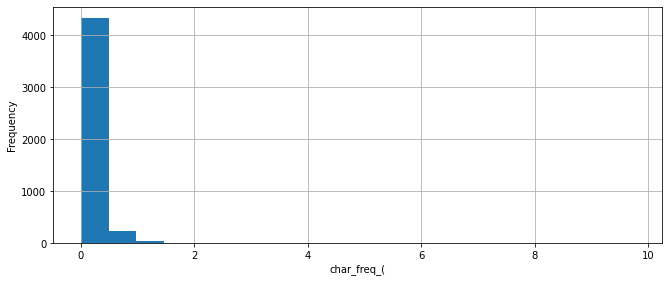

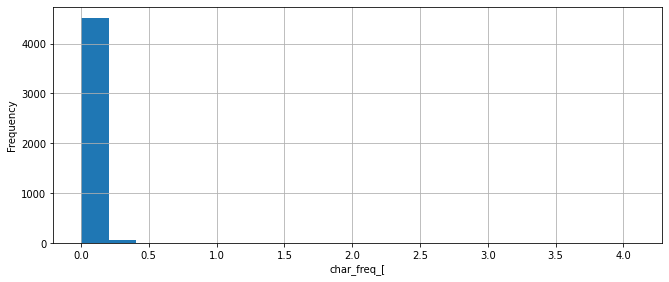

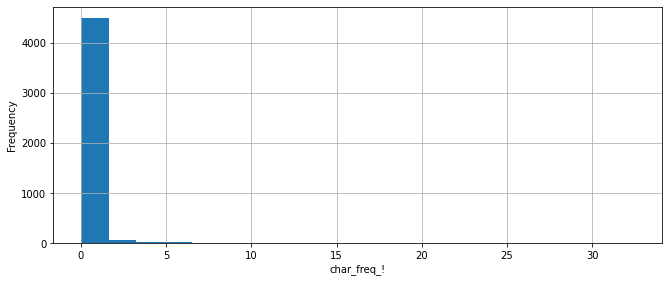

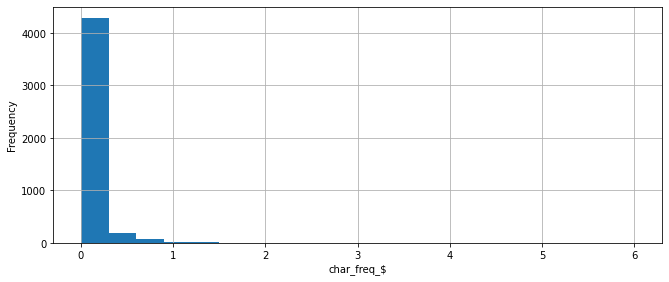

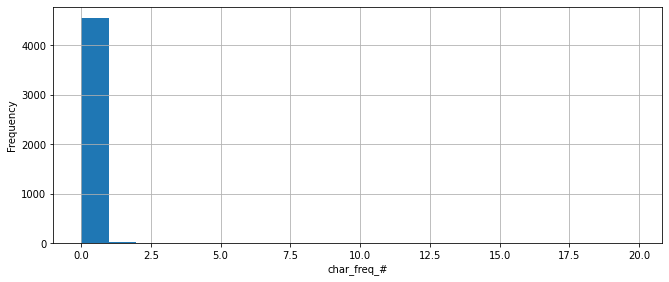

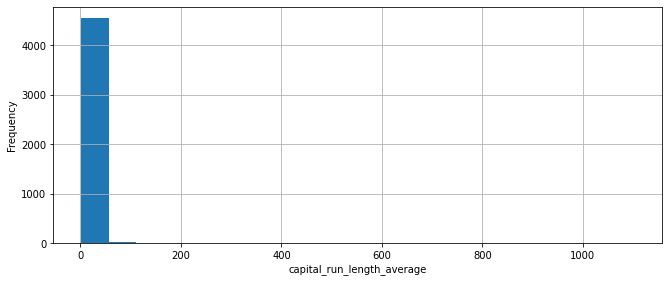

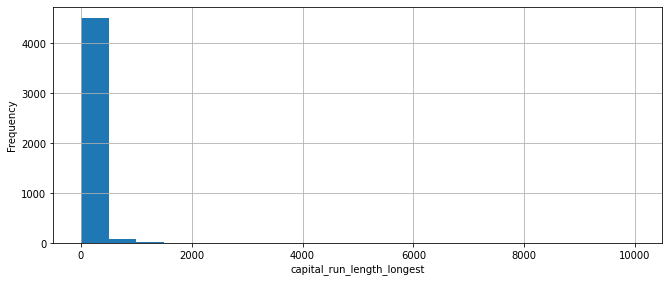

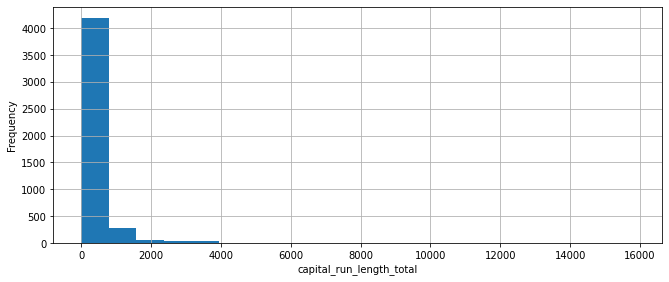

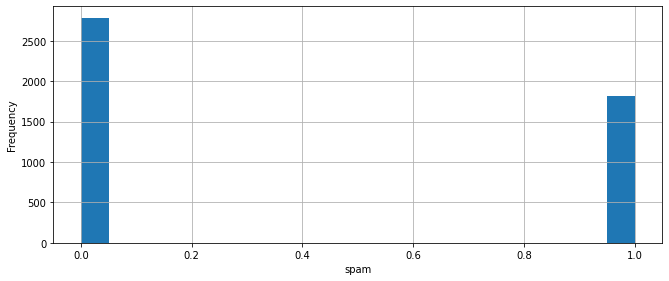

In [197]:
# plot histogram to check distribution
for i in df:
  plt.figure(figsize=(24,20))
  plt.subplot(4, 2, 1)
  fig = df[i].hist(bins=20)
  fig.set_xlabel(i)
  fig.set_ylabel('Frequency')


The distributions above purport a positive skew showing that our data is not normally distributed and that the mean is to the right of the peak.

## Implementing the solution

In [237]:
# Import libaries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


x = df.drop(columns='spam')
y = df['spam']
# splitting dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

ss = StandardScaler()
ss.fit(x_train)
x_train = ss.transform(x_train)
x_test = ss.transform(x_test)

In [238]:
# Training our model

clf = GaussianNB()  
model = clf.fit(x_train, y_train) 

In [239]:
y_pred = model.predict(x_test)

In [240]:
print(accuracy_score(y_test,y_pred))

0.8002171552660152


The model correctly classifies email as spam or not 80% of the time according to the accuracy score

In [241]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[382 156]
 [ 28 355]]
              precision    recall  f1-score   support

           0       0.93      0.71      0.81       538
           1       0.69      0.93      0.79       383

    accuracy                           0.80       921
   macro avg       0.81      0.82      0.80       921
weighted avg       0.83      0.80      0.80       921



The confusion matrix shows that the model truly predicts 382 positives,falsely 156 positives,truly predicts 28 negatives and falsely 355 negatives.
The model could therefore do better.

In [242]:
# repeating model building with different splitting percentages
# 70-30
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [243]:
# Training our model

clf = GaussianNB()  
model = clf.fit(x_train, y_train) 

In [244]:
y_pred = model.predict(x_test)

In [245]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8124547429398986
[[597 225]
 [ 34 525]]
              precision    recall  f1-score   support

           0       0.95      0.73      0.82       822
           1       0.70      0.94      0.80       559

    accuracy                           0.81      1381
   macro avg       0.82      0.83      0.81      1381
weighted avg       0.85      0.81      0.81      1381



In [246]:
# 60-40
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=0)

In [247]:
# Training our model
clf = GaussianNB()  
model = clf.fit(x_train, y_train) 

In [248]:
y_pred = model.predict(x_test)

In [249]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8261814231395981
[[819 278]
 [ 42 702]]
              precision    recall  f1-score   support

           0       0.95      0.75      0.84      1097
           1       0.72      0.94      0.81       744

    accuracy                           0.83      1841
   macro avg       0.83      0.85      0.83      1841
weighted avg       0.86      0.83      0.83      1841



Notice that the model's accuracy slightly increases with an increase in the test data.

## Optimization using the removal of redundant/correlated features as part of feature selection

In [250]:
corr = df.corr()
corr

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_ove,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
word_freq_make,1.000000,-0.016759,0.065627,0.013273,0.023119,0.059674,0.007669,-0.003950,0.106263,0.041198,0.188459,0.105801,0.066438,0.036780,0.028439,0.059386,0.081928,0.053324,0.128243,0.021295,0.197049,-0.024349,0.134072,0.188155,-0.072504,-0.061686,-0.066424,-0.048680,-0.041251,-0.052799,-0.039066,-0.032058,-0.041014,-0.027690,-0.044954,-0.054673,-0.057312,-0.007960,-0.011134,-0.036095,-0.009703,-0.026070,-0.024292,-0.022116,-0.037105,-0.034056,-0.000953,-0.017755,-0.026505,-0.021196,-0.033301,0.058292,0.117419,-0.008844,0.044491,0.061382,0.089165,0.126208
word_freq_address,-0.016759,1.000000,-0.033526,-0.006923,-0.023760,-0.024840,0.003918,-0.016280,-0.003826,0.032962,-0.006864,-0.040398,-0.018858,-0.009206,0.005330,-0.009117,-0.018370,0.033500,-0.055476,-0.015806,-0.018191,-0.008850,-0.020502,0.001984,-0.043483,-0.038211,-0.030307,-0.029221,-0.021940,-0.027508,-0.018097,-0.003326,-0.024903,-0.004303,-0.024058,-0.028198,-0.024013,-0.008922,-0.019124,-0.014821,-0.015420,-0.025177,-0.002370,-0.019739,-0.016418,-0.023858,-0.009818,-0.015747,-0.007282,-0.049837,-0.018527,-0.014461,-0.009605,0.001946,0.002083,0.000271,-0.022680,-0.030224
word_freq_all,0.065627,-0.033526,1.000000,-0.020246,0.077734,0.087564,0.036677,0.012003,0.093786,0.032075,0.048254,0.083210,0.047593,0.008552,0.122113,0.063906,0.036262,0.121923,0.139329,0.031111,0.156651,-0.035681,0.123671,0.041145,-0.087924,-0.062459,-0.108886,-0.050648,-0.057726,-0.032547,-0.038927,-0.061870,-0.054759,-0.061706,-0.048335,-0.046504,-0.067015,0.032407,-0.014809,-0.047066,-0.030956,-0.005811,-0.044325,-0.053464,-0.050664,-0.056655,0.029339,-0.026344,-0.033213,-0.016495,-0.033120,0.108140,0.087618,-0.003336,0.097398,0.107463,0.070114,0.196988
word_freq_3d,0.013273,-0.006923,-0.020246,1.000000,0.003238,-0.010014,0.019784,0.010268,-0.002454,-0.004947,-0.012976,-0.019221,-0.013199,0.012008,0.002707,0.007432,0.003470,0.019391,-0.010834,-0.005381,0.008176,0.028102,0.011368,0.035360,-0.015181,-0.013708,-0.010684,-0.010368,-0.007798,-0.010476,-0.007529,-0.006717,-0.008075,-0.006729,-0.006122,-0.006515,-0.007761,-0.002669,-0.004602,-0.007643,-0.005670,-0.008095,-0.009268,-0.005933,-0.012957,-0.009181,-0.003348,-0.001924,-0.000591,-0.012370,-0.007148,-0.003138,0.010862,-0.000298,0.005260,0.022081,0.021369,0.057371
word_freq_our,0.023119,-0.023760,0.077734,0.003238,1.000000,0.054054,0.147336,0.029598,0.020823,0.034495,0.068382,0.066788,0.031126,0.003445,0.056177,0.083024,0.143443,0.062344,0.098510,0.031526,0.136605,-0.020207,0.070037,0.000039,-0.072502,-0.075456,-0.088011,-0.061501,0.032048,-0.052066,-0.042535,-0.026748,-0.031998,-0.026960,-0.049732,-0.048844,-0.072599,0.130812,-0.042044,-0.021442,-0.047505,0.115041,-0.048879,0.015234,-0.042336,-0.077986,-0.026900,-0.032005,-0.032759,-0.046361,-0.026390,0.025509,0.041582,0.002016,0.052662,0.052290,0.002492,0.241920
word_freq_ove,0.059674,-0.024840,0.087564,-0.010014,0.054054,1.000000,0.061163,0.079561,0.117438,0.013897,0.053900,0.009264,0.077631,0.009673,0.173066,0.019865,0.064137,0.078350,0.095505,0.058979,0.106833,0.007956,0.211455,0.0593

In [251]:
# Correlation with output variable
corr_target = abs(corr['spam'])
# Selecting highly correlated features with target variable
relevant_features = corr_target[corr_target>0.3]
relevant_features

word_freq_remove    0.332117
word_freq_your      0.383234
word_freq_000       0.334787
char_freq_$         0.323629
spam                1.000000
Name: spam, dtype: float64

In [252]:
# creating a naive classifier model with reduced number of features
x = df[['word_freq_remove','word_freq_your','word_freq_000','char_freq_$']]
y = df['spam']

# splitting dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [253]:
# Training our model

clf = GaussianNB()  
model = clf.fit(x_train, y_train) 

In [254]:
y_pred = model.predict(x_test)

In [255]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7937024972855592
[[506  32]
 [158 225]]
              precision    recall  f1-score   support

           0       0.76      0.94      0.84       538
           1       0.88      0.59      0.70       383

    accuracy                           0.79       921
   macro avg       0.82      0.76      0.77       921
weighted avg       0.81      0.79      0.78       921



We notice that the model's performance slightly reduces once feature engineering is done to create a model with the most influential features from our correlation matrix above.

## Optimization using normalizer

In [257]:
x = df.drop(columns='spam')
y = df['spam']

from sklearn.preprocessing import Normalizer
# Create normalizer
normalizer = Normalizer(norm='l2')

# Transform feature matrix
normalizer.transform(x)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but Normalizer was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([[0.00000000e+00, 2.24834975e-03, 2.24834975e-03, ...,
        1.31950026e-02, 2.14295835e-01, 9.76626921e-01],
       [2.03297105e-04, 2.71062806e-04, 4.84040726e-04, ...,
        4.95076854e-03, 9.77762266e-02, 9.95187732e-01],
       [2.59683978e-05, 0.00000000e+00, 3.07292708e-04, ...,
        4.25059392e-03, 2.09911216e-01, 9.77710178e-01],
       ...,
       [2.53812946e-03, 0.00000000e+00, 2.53812946e-03, ...,
        1.18784459e-02, 5.07625892e-02, 9.98330921e-01],
       [1.22759766e-02, 0.00000000e+00, 0.00000000e+00, ...,
        1.46672345e-02, 6.39373781e-02, 9.97423098e-01],
       [0.00000000e+00, 0.00000000e+00, 1.59858723e-02, ...,
        3.07420620e-02, 1.22968248e-01, 9.83745986e-01]])

In [258]:
# splitting dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [259]:
# Training our model

clf = GaussianNB()  
model = clf.fit(x_train, y_train) 

In [260]:
# predicting
y_pred = model.predict(x_test)

In [261]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8067318132464713
[[386 152]
 [ 26 357]]
              precision    recall  f1-score   support

           0       0.94      0.72      0.81       538
           1       0.70      0.93      0.80       383

    accuracy                           0.81       921
   macro avg       0.82      0.82      0.81       921
weighted avg       0.84      0.81      0.81       921



The performance increases by 0.67% compared to the first model created.